In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_raw = pd.read_csv('APC_SL_176_mfl.csv', delimiter=';')
df_raw

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


CalendarDateKey DepartureLineTransportMode            ContractName  \
0             20221031                      TRAIN  Pendeltågsverksamheten   
1             20221031                      TRAIN  Pendeltågsverksamheten   
2             20221031                      TRAIN  Pendeltågsverksamheten   
3             20221031                      TRAIN  Pendeltågsverksamheten   
4             20221031                      TRAIN  Pendeltågsverksamheten   
...                ...                        ...                     ...   
21148         20221101                       TRAM            Roslagsbanan   
21149         20221101                       TRAM            Roslagsbanan   
21150         20221101                       TRAM            Roslagsbanan   
21151         20221101                       TRAM            Roslagsbanan   
21152         20221101                       TRAM            Roslagsbanan   

       DepartureLineNumber DepartureJourneyPatternStartPointName  \
0                       40                             Uppsala C   
1                       40                             Uppsala C   
2                       40                             Uppsala C   
3                       40                             Uppsala C   
4                       40                             Uppsala C   
...                    ...                                   ...   
21148                   28                             Österskär   
21149                   28                             Österskär   
21150                   28                             Österskär   
21151                   28                             Österskär   
21152                   28                             Österskär   

      DepartureJourneyPatternEndPointName TripDepTime  \
0                          Stockholm City    00:26:00   
1                          Stockholm City    00:26:00   
2                          Stockholm City    00:26:00   
3                          Stockholm City    00:26:00   
4                          Stockholm City    00:26:00   
...                                   ...         ...   
21148                    Stockholms östra    23:55:00   
21149                    Stockholms östra    23:55:00   
21150                    Stockholms östra    23:55:00   
21151                    Stockholms östra    23:55:00   
21152                    Stockholms östra    23:55:00   

       StopPointSequenceNumber     StopPointName  CarOrderPos  ...  \
0                            1         Uppsala C            1  ...   
1                            2           Knivsta            1  ...   
2                            3   Arlanda central            1  ...   
3                            4    Upplands Väsby            1  ...   
4                            5           Rotebro            1  ...   
...                        ...               ...          ...  ...   
21148                       19     Universitetet            2  ...   
21149                       19     Universitetet            3  ...   
21150                       20  Stockholms östra            1  ...   
21151                       20  Stockholms östra            2  ...   
21152                       20  Stockholms östra            3  ...   

      avgAlightingsImp avgCurrentLoadImp  BoardingsApc AlightingsApc  \
0                  0,0              18,0           NaN           NaN   
1                  9,0               9,0           NaN           NaN   
2                  0,0              42,0           NaN           NaN   
3                  3,0              45,0           NaN           NaN   
4                  0,0              50,0           NaN           NaN   
...                ...               ...           ...           ...   
21148              0,0               2,0           0.0           0.0   
21149              0,0               3,0           NaN           NaN   
21150              2,0               0,0           NaN           NaN   
21151              

In [2]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21153 entries, 0 to 21152
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CalendarDateKey                        21153 non-null  int64  
 1   DepartureLineTransportMode             21153 non-null  object 
 2   ContractName                           21153 non-null  object 
 3   DepartureLineNumber                    21153 non-null  int64  
 4   DepartureJourneyPatternStartPointName  21153 non-null  object 
 5   DepartureJourneyPatternEndPointName    21153 non-null  object 
 6   TripDepTime                            21153 non-null  object 
 7   StopPointSequenceNumber                21153 non-null  int64  
 8   StopPointName                          21153 non-null  object 
 9   CarOrderPos                            21153 non-null  int64  
 10  DepTime                                21153 non-null  object 
 11  Ar

In [3]:
# replace decimals with . and make float
df['Boardings_nmb'] = df['Boardings'].str.replace(',','.')
df['Boardings_nmb'] = df['Boardings_nmb'].astype('float16').round(0)
df


CalendarDateKey DepartureLineTransportMode            ContractName  \
0             20221031                      TRAIN  Pendeltågsverksamheten   
1             20221031                      TRAIN  Pendeltågsverksamheten   
2             20221031                      TRAIN  Pendeltågsverksamheten   
3             20221031                      TRAIN  Pendeltågsverksamheten   
4             20221031                      TRAIN  Pendeltågsverksamheten   
...                ...                        ...                     ...   
21148         20221101                       TRAM            Roslagsbanan   
21149         20221101                       TRAM            Roslagsbanan   
21150         20221101                       TRAM            Roslagsbanan   
21151         20221101                       TRAM            Roslagsbanan   
21152         20221101                       TRAM            Roslagsbanan   

       DepartureLineNumber DepartureJourneyPatternStartPointName  \
0                       40                             Uppsala C   
1                       40                             Uppsala C   
2                       40                             Uppsala C   
3                       40                             Uppsala C   
4                       40                             Uppsala C   
...                    ...                                   ...   
21148                   28                             Österskär   
21149                   28                             Österskär   
21150                   28                             Österskär   
21151                   28                             Österskär   
21152                   28                             Österskär   

      DepartureJourneyPatternEndPointName TripDepTime  \
0                          Stockholm City    00:26:00   
1                          Stockholm City    00:26:00   
2                          Stockholm City    00:26:00   
3                          Stockholm City    00:26:00   
4                          Stockholm City    00:26:00   
...                                   ...         ...   
21148                    Stockholms östra    23:55:00   
21149                    Stockholms östra    23:55:00   
21150                    Stockholms östra    23:55:00   
21151                    Stockholms östra    23:55:00   
21152                    Stockholms östra    23:55:00   

       StopPointSequenceNumber     StopPointName  CarOrderPos  ...  \
0                            1         Uppsala C            1  ...   
1                            2           Knivsta            1  ...   
2                            3   Arlanda central            1  ...   
3                            4    Upplands Väsby            1  ...   
4                            5           Rotebro            1  ...   
...                        ...               ...          ...  ...   
21148                       19     Universitetet            2  ...   
21149                       19     Universitetet            3  ...   
21150                       20  Stockholms östra            1  ...   
21151                       20  Stockholms östra            2  ...   
21152                       20  Stockholms östra            3  ...   

      avgCurrentLoadImp BoardingsApc  AlightingsApc CurrentLoadApc  \
0                  18,0          NaN            NaN            NaN   
1                   9,0          NaN            NaN            NaN   
2                  42,0          NaN            NaN            NaN   
3                  45,0          NaN            NaN            NaN   
4                  50,0          NaN            NaN            NaN   
...                 ...          ...            ...            ...   
21148               2,0          0.0            0.0            3.0   
21149               3,0          NaN            NaN            NaN   
21150               0,0          NaN            NaN            NaN   
21151               0,0          0.0   

In [4]:
df['Boardings_nmb'].max()

310.0

In [5]:
cols = ['CalendarDateKey','DepartureLineNumber','StopPointName', 'TripDepTime', 'Boardings','Boardings_nmb','Alightings','CentroidEastingCoordinate', 'CentroidNorthingCoordinate']

df_apc = df[cols]
df_apc

CalendarDateKey  DepartureLineNumber     StopPointName TripDepTime  \
0             20221031                   40         Uppsala C    00:26:00   
1             20221031                   40           Knivsta    00:26:00   
2             20221031                   40   Arlanda central    00:26:00   
3             20221031                   40    Upplands Väsby    00:26:00   
4             20221031                   40           Rotebro    00:26:00   
...                ...                  ...               ...         ...   
21148         20221101                   28     Universitetet    23:55:00   
21149         20221101                   28     Universitetet    23:55:00   
21150         20221101                   28  Stockholms östra    23:55:00   
21151         20221101                   28  Stockholms östra    23:55:00   
21152         20221101                   28  Stockholms östra    23:55:00   

      Boardings  Boardings_nmb Alightings  CentroidEastingCoordinate  \
0          18,0           18.0        0,0                  17.648593   
1           0,0            0.0        9,0                  17.786740   
2          33,0           33.0        0,0                  17.928518   
3           6,0            6.0        3,0                  17.899546   
4           5,0            5.0        0,0                  17.914091   
...         ...            ...        ...                        ...   
21148       0,0            0.0        0,0                  18.050983   
21149       0,0            0.0        0,0                  18.050983   
21150       0,0            0.0        2,0                  18.070055   
21151       0,0            0.0        3,0                  18.070055   
21152       0,0            0.0        3,0                  18.070055   

       CentroidNorthingCoordinate  
0                       59.858521  
1                       59.726369  
2                       59.649384  
3                       59.521641  
4                       59.476565  
...                           ...  
21148                   59.365088  
21149                   59.365088  
21150                   59.346800  
21151                   59.346800  
21152                   59.346800  

[21153 rows x 9 columns]

In [6]:
df_apc["DepartureLineNumber"].unique()

array([ 40,  28, 176, 677])

In [7]:
df_apc.columns = ['CalendarDateKey', 'DepartureLineNumber', 'StopPointName', 'TripDepTime', 'Boardings', 'Boardings_nmb', 'Alightings', 'CentroidLong', 'CentroidLat']
df_apc

CalendarDateKey  DepartureLineNumber     StopPointName TripDepTime  \
0             20221031                   40         Uppsala C    00:26:00   
1             20221031                   40           Knivsta    00:26:00   
2             20221031                   40   Arlanda central    00:26:00   
3             20221031                   40    Upplands Väsby    00:26:00   
4             20221031                   40           Rotebro    00:26:00   
...                ...                  ...               ...         ...   
21148         20221101                   28     Universitetet    23:55:00   
21149         20221101                   28     Universitetet    23:55:00   
21150         20221101                   28  Stockholms östra    23:55:00   
21151         20221101                   28  Stockholms östra    23:55:00   
21152         20221101                   28  Stockholms östra    23:55:00   

      Boardings  Boardings_nmb Alightings  CentroidLong  CentroidLat  
0          18,0           18.0        0,0     17.648593    59.858521  
1           0,0            0.0        9,0     17.786740    59.726369  
2          33,0           33.0        0,0     17.928518    59.649384  
3           6,0            6.0        3,0     17.899546    59.521641  
4           5,0            5.0        0,0     17.914091    59.476565  
...         ...            ...        ...           ...          ...  
21148       0,0            0.0        0,0     18.050983    59.365088  
21149       0,0            0.0        0,0     18.050983    59.365088  
21150       0,0            0.0        2,0     18.070055    59.346800  
21151       0,0            0.0        3,0     18.070055    59.346800  
21152       0,0            0.0        3,0     18.070055    59.346800  

[21153 rows x 9 columns]

In [8]:
#define how to aggregate various fields
# agg_functions = {'StopPointName': 'first', 'Boardings_nmb': 'sum','CentroidNorthingCoordinate':'first','CentroidEastingCoordinate': 'first', 'DepartureLineNumber':'first','CalendarDateKey': 'first'}
agg_functions = {'StopPointName': 'first', 'Boardings_nmb': 'sum','CentroidLat':'first','CentroidLong': 'first', 'DepartureLineNumber':'first','CalendarDateKey': 'first'}

#create new DataFrame by combining rows with same id values
df_new = df_apc.groupby(df_apc['StopPointName']).aggregate(agg_functions)

#view new DataFrame
print(df_new)

                   StopPointName  Boardings_nmb  CentroidLat  CentroidLong  \
StopPointName                                                                
Alhamra                  Alhamra            5.0    59.735269     18.281700   
Arlanda central  Arlanda central         2012.0    59.649384     17.928518   
Arninge                  Arninge         1101.0    59.458864     18.141348   
Bergshamra bro    Bergshamra bro          156.0    59.380031     18.032826   
Betlehem                Betlehem            0.0    59.300293     17.809867   
...                          ...            ...          ...           ...   
Åkersberga            Åkersberga         3456.0    59.479001     18.299776   
Årstaberg              Årstaberg         2514.0    59.299685     18.028338   
Österskär              Österskär          528.0    59.460756     18.311586   
Östertälje            Östertälje         1323.0    59.183789     17.661441   
Östra Libby          Östra Libby            0.0    59.732950    

In [9]:
df_line = df_new.loc[(df_new["DepartureLineNumber"] == 176)]
df_line

StopPointName  Boardings_nmb  \
StopPointName                                                               
Bergshamra bro                              Bergshamra bro          156.0   
Betlehem                                          Betlehem            0.0   
Brommaplan                                      Brommaplan         1562.0   
Brostugan                                        Brostugan           29.0   
Danderyds sjukhus                        Danderyds sjukhus          663.0   
Drottningholm                                Drottningholm          111.0   
Ekeberga                                          Ekeberga            2.0   
Ekebyhov                                          Ekebyhov          160.0   
Ekerö centrum                                Ekerö centrum            0.0   
Eknäs                                                Eknäs          130.0   
Ekvägen                                            Ekvägen          135.0   
Frösunda                                          Frösunda          216.0   
Färentunavägen                              Färentunavägen            0.0   
Fårhagen                                          Fårhagen           36.0   
Fårhagsplan                                    Fårhagsplan          138.0   
Hammargården                                  Hammargården           48.0   
Järva krog                                      Järva krog          142.0   
Kanton                                              Kanton           55.0   
Kolonnvägen                                    Kolonnvägen           67.0   
Lindö lada                                      Lindö lada            0.0   
Lovö Edeby                                      Lovö Edeby           13.0   
Lullehov                                          Lullehov            4.0   
Malmvik                                            Malmvik            0.0   
Mörby station                                Mörby station          229.0   
Mörbyvägen                                      Mörbyvägen           51.0   
Nockeby                                            Nockeby          178.0   
Norrbyvägen                                    Norrbyvägen           91.0   
Orangeriet                                      Orangeriet            3.0   
Riksbyvägen                                    Riksbyvägen           63.0   
Rosenborg                                        Rosenborg            9.0   
Solbacka                                          Solbacka           26.0   
Solna centrum norra                    Solna centrum norra          496.0   
Solna station                                Solna station          837.0   
Solna strand - Huvudstaleden  Solna strand - Huvudstaleden          177.0   
Solnahallen                                    Solnahallen          217.0   
Stenhamra centrum                        Stenhamra centrum          219.0   
Svanhagen                                        Svanhagen          231.0   
Tappström                                        Tappström          676.0   
Tillflykten                                    Tillflykten            8.0   
Troxhammar                                      Troxhammar           52.0   
Törnby                                              Törnby            1.0   
Voltavägen                                      Voltavägen          196.0   
Västeräng                                        Västeräng            1.0   

                              CentroidLat  CentroidLong  DepartureLineNumber  \
StopPointName                                                                  
Bergshamra bro                  59.380031     18.032826                  176   
Betlehem                        59.300293     17.809867                  176   
Brommaplan                      59.338211     17.938108                  176   
Brostugan                       59.325899     17.903065                  176   
Danderyds sjukhus               59.390125     18.042581                  176   
Drottningholm      

In [10]:
df_new.loc[(df_new['StopPointName'] == 'Brommaplan')]

StopPointName  Boardings_nmb  CentroidLat  CentroidLong  \
StopPointName                                                           
Brommaplan       Brommaplan         1562.0    59.338211     17.938108   

               DepartureLineNumber  CalendarDateKey  
StopPointName                                        
Brommaplan                     176         20221101

<Axes: ylabel='StopPointName'>

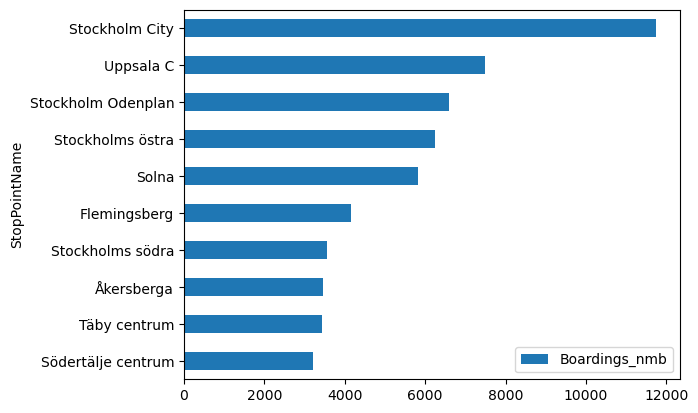

In [11]:
# Sort
df_new.sort_values(by="Boardings_nmb",ascending=True).tail(10).plot.barh(x='StopPointName',y='Boardings_nmb')

In [12]:
import plotly.express as px

In [13]:
df_line.head()

StopPointName  Boardings_nmb  CentroidLat  \
StopPointName                                                      
Bergshamra bro        Bergshamra bro          156.0    59.380031   
Betlehem                    Betlehem            0.0    59.300293   
Brommaplan                Brommaplan         1562.0    59.338211   
Brostugan                  Brostugan           29.0    59.325899   
Danderyds sjukhus  Danderyds sjukhus          663.0    59.390125   

                   CentroidLong  DepartureLineNumber  CalendarDateKey  
StopPointName                                                          
Bergshamra bro        18.032826                  176         20221101  
Betlehem              17.809867                  176         20221101  
Brommaplan            17.938108                  176         20221101  
Brostugan             17.903065                  176         20221101  
Danderyds sjukhus     18.042581                  176         20221101

In [14]:
# Mapbox Map
mapbox_access_token =  'pk.eyJ1IjoidWxsaXoiLCJhIjoiY2xpY3hha2QyMG42bDNnbW9mYms5bTUyMyJ9.6-FqgXfSBrO5TFNQVZDrzA'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_line, lat="CentroidLat", lon="CentroidLong", size='Boardings_nmb', text=df_line['StopPointName'], title="linje: 176 - 2022-11-01", labels={
                     "Boardings_nmb": "Påstigande",
                     "StopPointName": "Stoppställe",
                 }, zoom=8)
fig.show()
fig.show(renderer="browser")

In [15]:
# df1 = df_apc_line.drop_duplicates(subset=["StopPointName"], keep="first")
# print(df1)